# Coding Portion: Fashion Item Classification

* Dataset used: **Fashion MNIST** (28 x 28 grayscale images of fashion items)
* Dataset size: 60,000 training samples, 10,000 test samples
* Dataset source: https://github.com/zalandoresearch/fashion-mnist

#### Classification Labels:
Label | Description
:--- | ---
0 | T-shirt/top
1 | Trouser
2 | Pullover
3 | Dress
4 | Coat
5 | Sandal
6 | Shirt
7 | Sneaker
8 | Bag
9 | Ankle boot

### Step 1: Load in the Data

In [7]:
# Import Fashion-MNIST dataset from 'fashion' folder

from fashion import mnist_reader
X_train, y_train = mnist_reader.load_mnist('fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion', kind='t10k')

In [8]:
# Data exploration

print("Inputs shape is " + str(X_train.shape)) # 60,000 flattened image vectors (784 pixels long)
print("Input type is " + str(type(X_train)))
print("Labels:")
print(y_train)
print("Labels shape is" + str(y_train.shape)) # 60,000 labels
print("Labels type is " + str(type(y_train)))

Inputs shape is (60000, 784)
Input type is <class 'numpy.ndarray'>
Labels:
[9 0 0 ... 3 0 5]
Labels shape is(60000,)
Labels type is <class 'numpy.ndarray'>


In [9]:
# Convert numerical label to item description

def to_description(label):
    if label == 0: return "T-shirt/top"
    elif label == 1: return "Trouser"
    elif label == 2: return "Pullover"
    elif label == 3: return "Dress"
    elif label == 4: return "Coat"
    elif label == 5: return "Sandal"
    elif label == 6: return "Shirt"
    elif label == 7: return "Sneaker"
    elif label == 8: return "Bag"
    elif label == 9: return "Ankle boot"
    else: return "Label not found"

In [10]:
# Visualize the training examples

import matplotlib.pyplot as plt
import numpy as np

def visualize_sample(sample_num):
    flattened_vector = X_train[sample_num] # retrieve flattened vector
    image_2d = np.reshape(flattened_vector, (28, 28)) # reshape to 28 x 28 grayscale image array
    plt.imshow(image_2d, cmap = plt.get_cmap('gray')) # feed image into matplotlib
    print("Label: ", y_train[sample_num]) # print actual label
    print("Description: ", to_description(y_train[sample_num])) # print description
    plt.show()
    
    
visualize_sample(0)

Label:  9
Description:  Ankle boot


<Figure size 640x480 with 1 Axes>

### Step 2: Data Pre-Processing
1. Normalize the feature vectors/pixel values
2. Categorize the outputs

In [12]:
# Normalize the X_train and X_test dataset pixel values to between 0-1

X_train=X_train/255.0
X_test=X_test/255.0
# TODO: fill this in
    # Hint: maximum pixel value is still 255
    

In [41]:
import keras

# TODO: Use Keras to categorize the outputs ("one-hot" vectors)
    # Use variable names: y_train_categorical, y_test_categorical
    # hint: use the to_categorical() keras function to do this for you
    
y_train_categorical = keras.utils.to_categorical(y_train,num_classes=10)
y_test_categorical = keras.utils.to_categorical(y_test,num_classes=10)
# let's see result of categorizing the output
print(y_test_categorical[:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### Step 3: Create and Compile Neural Network Model

In [42]:
from keras.layers import Dense, Activation
from keras.models import Sequential

model = Sequential()

# TODO: fill this in
# Feel free to experiment with different number of layers, number of neurons, activation functions, etc.
    # Activation functions: https://keras.io/activations/
    # Declaring Keras layers: https://keras.io/layers/core/
    
### Add 1st layer here. Remember that the input_dimension should match up with the input vector dimension!
model.add(Dense(units= 500 , input_dim = 784,activation ='relu'))
### Add 2nd layer here.
model.add(Dense(units=250,activation='relu'))

# Add final layer here. Make sure the last layer matches up the output vector dimension
    # Hint: use softmax again to output classification probabilities
model.add(Dense(units=10,activation='softmax'))


In [43]:
# TODO: Compile model
    # Loss: categorical cross-entropy
model.compile( optimizer='sgd',loss ='categorical_crossentropy', metrics=['accuracy'])  
    # Optimizer: stochastic gradient descent
        # Or: experiment with other optimizers? https://keras.io/optimizers/
    # Metrics: accuracy
        

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_11 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2510      
Total params: 520,260
Trainable params: 520,260
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Import relevant libraries
from keras_tqdm import TQDMNotebookCallback # TQDM: progress bars
from keras.callbacks import TensorBoard # Tensorboard: training plots
    
# Clear any existing Tensorboard logs
import shutil
shutil.rmtree('./logs', ignore_errors=True)

# Set up callback links to refer back to during training
tensorboard = TensorBoard()
callbacks_list = [TQDMNotebookCallback(), tensorboard]

In [48]:
# TODO: Fit model to training data
    # Reserve some fraction of training data as validation data
    # Pick number of epochs
    # Pick a batch_size
    # Pass in relevant callbacks_list from above
model.fit(X_train,y_train_categorical,batch_size=350, epochs=7, validation_split=.1428,callbacks=callbacks_list)
    
    
    

Train on 51432 samples, validate on 8568 samples


Epoch 1/7


51432/51432 [==============================] - ETA: 5s - loss: 0.5637 - acc: 0.828 - ETA: 3s - loss: 0.5775 - acc: 0.814 - ETA: 3s - loss: 0.5795 - acc: 0.818 - ETA: 2s - loss: 0.5681 - acc: 0.818 - ETA: 2s - loss: 0.5704 - acc: 0.813 - ETA: 2s - loss: 0.5742 - acc: 0.812 - ETA: 2s - loss: 0.5764 - acc: 0.811 - ETA: 2s - loss: 0.5744 - acc: 0.810 - ETA: 2s - loss: 0.5695 - acc: 0.811 - ETA: 2s - loss: 0.5691 - acc: 0.811 - ETA: 2s - loss: 0.5704 - acc: 0.811 - ETA: 2s - loss: 0.5686 - acc: 0.813 - ETA: 2s - loss: 0.5714 - acc: 0.812 - ETA: 2s - loss: 0.5702 - acc: 0.813 - ETA: 1s - loss: 0.5694 - acc: 0.813 - ETA: 1s - loss: 0.5705 - acc: 0.812 - ETA: 1s - loss: 0.5722 - acc: 0.811 - ETA: 1s - loss: 0.5705 - acc: 0.811 - ETA: 1s - loss: 0.5709 - acc: 0.811 - ETA: 1s - loss: 0.5722 - acc: 0.810 - ETA: 1s - loss: 0.5707 - acc: 0.811 - ETA: 1s - loss: 0.5698 - acc: 0.811 - ETA: 1s - loss: 0.5695 - acc: 0.812 - ETA: 1s - loss: 0.5696 - acc: 0.812 - ETA: 1s - loss: 0.5689 - acc: 0.812 - ETA

51432/51432 [==============================] - ETA: 5s - loss: 0.5100 - acc: 0.808 - ETA: 3s - loss: 0.5471 - acc: 0.814 - ETA: 2s - loss: 0.5486 - acc: 0.817 - ETA: 2s - loss: 0.5478 - acc: 0.818 - ETA: 2s - loss: 0.5523 - acc: 0.815 - ETA: 2s - loss: 0.5495 - acc: 0.817 - ETA: 2s - loss: 0.5499 - acc: 0.818 - ETA: 2s - loss: 0.5479 - acc: 0.819 - ETA: 2s - loss: 0.5481 - acc: 0.818 - ETA: 2s - loss: 0.5471 - acc: 0.819 - ETA: 2s - loss: 0.5491 - acc: 0.818 - ETA: 2s - loss: 0.5487 - acc: 0.818 - ETA: 2s - loss: 0.5498 - acc: 0.818 - ETA: 1s - loss: 0.5514 - acc: 0.817 - ETA: 1s - loss: 0.5536 - acc: 0.817 - ETA: 1s - loss: 0.5550 - acc: 0.816 - ETA: 1s - loss: 0.5524 - acc: 0.817 - ETA: 1s - loss: 0.5500 - acc: 0.818 - ETA: 1s - loss: 0.5474 - acc: 0.819 - ETA: 1s - loss: 0.5470 - acc: 0.820 - ETA: 1s - loss: 0.5470 - acc: 0.820 - ETA: 1s - loss: 0.5490 - acc: 0.819 - ETA: 1s - loss: 0.5451 - acc: 0.821 - ETA: 1s - loss: 0.5444 - acc: 0.821 - ETA: 1s - loss: 0.5451 - acc: 0.821 - ETA

51432/51432 [==============================] - ETA: 6s - loss: 0.5076 - acc: 0.825 - ETA: 3s - loss: 0.4902 - acc: 0.844 - ETA: 3s - loss: 0.5061 - acc: 0.835 - ETA: 2s - loss: 0.5202 - acc: 0.830 - ETA: 2s - loss: 0.5227 - acc: 0.827 - ETA: 2s - loss: 0.5361 - acc: 0.822 - ETA: 2s - loss: 0.5363 - acc: 0.823 - ETA: 2s - loss: 0.5307 - acc: 0.824 - ETA: 2s - loss: 0.5318 - acc: 0.824 - ETA: 2s - loss: 0.5335 - acc: 0.822 - ETA: 2s - loss: 0.5318 - acc: 0.822 - ETA: 2s - loss: 0.5345 - acc: 0.821 - ETA: 2s - loss: 0.5350 - acc: 0.821 - ETA: 2s - loss: 0.5315 - acc: 0.822 - ETA: 1s - loss: 0.5302 - acc: 0.823 - ETA: 1s - loss: 0.5276 - acc: 0.823 - ETA: 1s - loss: 0.5280 - acc: 0.823 - ETA: 1s - loss: 0.5252 - acc: 0.824 - ETA: 1s - loss: 0.5257 - acc: 0.824 - ETA: 1s - loss: 0.5244 - acc: 0.825 - ETA: 1s - loss: 0.5240 - acc: 0.826 - ETA: 1s - loss: 0.5276 - acc: 0.825 - ETA: 1s - loss: 0.5285 - acc: 0.824 - ETA: 1s - loss: 0.5299 - acc: 0.824 - ETA: 1s - loss: 0.5296 - acc: 0.824 - ETA

51432/51432 [==============================] - ETA: 6s - loss: 0.5395 - acc: 0.805 - ETA: 3s - loss: 0.5048 - acc: 0.834 - ETA: 3s - loss: 0.5009 - acc: 0.836 - ETA: 2s - loss: 0.5144 - acc: 0.832 - ETA: 2s - loss: 0.5221 - acc: 0.830 - ETA: 2s - loss: 0.5224 - acc: 0.827 - ETA: 2s - loss: 0.5218 - acc: 0.827 - ETA: 2s - loss: 0.5208 - acc: 0.827 - ETA: 2s - loss: 0.5188 - acc: 0.828 - ETA: 2s - loss: 0.5148 - acc: 0.828 - ETA: 2s - loss: 0.5145 - acc: 0.828 - ETA: 2s - loss: 0.5170 - acc: 0.827 - ETA: 2s - loss: 0.5143 - acc: 0.828 - ETA: 2s - loss: 0.5150 - acc: 0.828 - ETA: 1s - loss: 0.5149 - acc: 0.828 - ETA: 1s - loss: 0.5157 - acc: 0.828 - ETA: 1s - loss: 0.5189 - acc: 0.826 - ETA: 1s - loss: 0.5188 - acc: 0.825 - ETA: 1s - loss: 0.5167 - acc: 0.825 - ETA: 1s - loss: 0.5167 - acc: 0.825 - ETA: 1s - loss: 0.5167 - acc: 0.826 - ETA: 1s - loss: 0.5165 - acc: 0.826 - ETA: 1s - loss: 0.5142 - acc: 0.826 - ETA: 1s - loss: 0.5151 - acc: 0.826 - ETA: 1s - loss: 0.5150 - acc: 0.826 - ETA

51432/51432 [==============================] - ETA: 5s - loss: 0.4761 - acc: 0.851 - ETA: 3s - loss: 0.4720 - acc: 0.842 - ETA: 2s - loss: 0.4786 - acc: 0.840 - ETA: 2s - loss: 0.4995 - acc: 0.831 - ETA: 2s - loss: 0.4944 - acc: 0.834 - ETA: 2s - loss: 0.4907 - acc: 0.836 - ETA: 2s - loss: 0.4913 - acc: 0.835 - ETA: 2s - loss: 0.4916 - acc: 0.836 - ETA: 2s - loss: 0.4992 - acc: 0.833 - ETA: 2s - loss: 0.4967 - acc: 0.834 - ETA: 2s - loss: 0.4988 - acc: 0.833 - ETA: 2s - loss: 0.4970 - acc: 0.834 - ETA: 2s - loss: 0.4986 - acc: 0.834 - ETA: 1s - loss: 0.5011 - acc: 0.834 - ETA: 1s - loss: 0.4990 - acc: 0.834 - ETA: 1s - loss: 0.5016 - acc: 0.832 - ETA: 1s - loss: 0.5016 - acc: 0.832 - ETA: 1s - loss: 0.5007 - acc: 0.832 - ETA: 1s - loss: 0.5017 - acc: 0.832 - ETA: 1s - loss: 0.5016 - acc: 0.833 - ETA: 1s - loss: 0.5024 - acc: 0.832 - ETA: 1s - loss: 0.5017 - acc: 0.832 - ETA: 1s - loss: 0.5012 - acc: 0.832 - ETA: 1s - loss: 0.5018 - acc: 0.832 - ETA: 1s - loss: 0.5025 - acc: 0.831 - ETA

51432/51432 [==============================] - ETA: 6s - loss: 0.4818 - acc: 0.845 - ETA: 3s - loss: 0.4936 - acc: 0.834 - ETA: 3s - loss: 0.5047 - acc: 0.828 - ETA: 2s - loss: 0.4883 - acc: 0.832 - ETA: 2s - loss: 0.4942 - acc: 0.830 - ETA: 2s - loss: 0.4963 - acc: 0.830 - ETA: 2s - loss: 0.4995 - acc: 0.831 - ETA: 2s - loss: 0.4957 - acc: 0.831 - ETA: 2s - loss: 0.4990 - acc: 0.829 - ETA: 2s - loss: 0.4948 - acc: 0.833 - ETA: 2s - loss: 0.4914 - acc: 0.834 - ETA: 2s - loss: 0.4942 - acc: 0.833 - ETA: 2s - loss: 0.4918 - acc: 0.834 - ETA: 2s - loss: 0.4958 - acc: 0.834 - ETA: 1s - loss: 0.4952 - acc: 0.834 - ETA: 1s - loss: 0.4951 - acc: 0.833 - ETA: 1s - loss: 0.4935 - acc: 0.833 - ETA: 1s - loss: 0.4945 - acc: 0.832 - ETA: 1s - loss: 0.4964 - acc: 0.832 - ETA: 1s - loss: 0.4952 - acc: 0.833 - ETA: 1s - loss: 0.4971 - acc: 0.832 - ETA: 1s - loss: 0.4983 - acc: 0.832 - ETA: 1s - loss: 0.4959 - acc: 0.833 - ETA: 1s - loss: 0.4959 - acc: 0.833 - ETA: 1s - loss: 0.4953 - acc: 0.834 - ETA

51432/51432 [==============================] - ETA: 5s - loss: 0.4717 - acc: 0.842 - ETA: 3s - loss: 0.4816 - acc: 0.842 - ETA: 2s - loss: 0.4744 - acc: 0.840 - ETA: 2s - loss: 0.4833 - acc: 0.837 - ETA: 2s - loss: 0.4772 - acc: 0.838 - ETA: 2s - loss: 0.4774 - acc: 0.838 - ETA: 2s - loss: 0.4756 - acc: 0.841 - ETA: 2s - loss: 0.4790 - acc: 0.839 - ETA: 2s - loss: 0.4841 - acc: 0.836 - ETA: 2s - loss: 0.4839 - acc: 0.836 - ETA: 2s - loss: 0.4840 - acc: 0.835 - ETA: 2s - loss: 0.4862 - acc: 0.835 - ETA: 1s - loss: 0.4861 - acc: 0.835 - ETA: 1s - loss: 0.4853 - acc: 0.835 - ETA: 1s - loss: 0.4876 - acc: 0.835 - ETA: 1s - loss: 0.4895 - acc: 0.834 - ETA: 1s - loss: 0.4883 - acc: 0.835 - ETA: 1s - loss: 0.4848 - acc: 0.836 - ETA: 1s - loss: 0.4841 - acc: 0.837 - ETA: 1s - loss: 0.4831 - acc: 0.837 - ETA: 1s - loss: 0.4818 - acc: 0.838 - ETA: 1s - loss: 0.4815 - acc: 0.838 - ETA: 1s - loss: 0.4819 - acc: 0.837 - ETA: 1s - loss: 0.4819 - acc: 0.838 - ETA: 1s - loss: 0.4823 - acc: 0.837 - ETA

### Step 4: Evaluate the Model

In [49]:
# TODO: Evaluate model on test data

# Use model.evaluate()
# Also: open up the training logs in Tensorboard to check validation_loss for overfitting
loss_and_metrics = model.evaluate(X_test, y_test_categorical, batch_size=128)

print(loss_and_metrics)

10000/10000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 41us/step
[0.5069769051551819, 0.8219]


In [52]:
# Final predictions testing

import numpy as np

# Compare actual class to predicted class
def visualize_test_sample(test_sample_num):
    
    # Display actual image & label
    flattened_vector = X_test[test_sample_num] # retrieve flattened vector
    image_2d = np.reshape(flattened_vector, (28, 28)) # reshape to 28 x 28 grayscale image array
    plt.imshow(image_2d, cmap = plt.get_cmap('gray')) # feed image into matplotlib
    print("Actual Label: ", y_test[test_sample_num]) # print actual label
    print("Actual Description: ", to_description(y_test[test_sample_num])) # print description
    plt.show()
    
    # Print predicted label
    test_sample = np.expand_dims(X_test[test_sample_num], axis=0) # pick out a one-sample "batch" to feed into model
    predicted_scores = model.predict(test_sample) # outputted probabilities vector
    print("Outputted scores: ", predicted_scores) # print predicted scores

    predicted_class = np.argmax(predicted_scores) # pick the class with highest probability --> final prediction
    print("Predicted Label: ", predicted_class) # print predicted classification
    print("Predicted Description: ", to_description(predicted_class)) # print predicted label description

Actual Label:  2
Actual Description:  Pullover


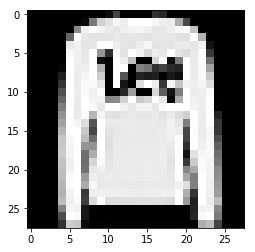

Outputted scores:  [[4.2893353e-04 7.0627316e-06 8.7448514e-01 1.5672561e-04 1.2990551e-02
  2.7078116e-07 1.1188243e-01 1.0971700e-08 4.8880025e-05 6.1159867e-08]]
Predicted Label:  2
Predicted Description:  Pullover


In [51]:
visualize_test_sample(1
                     )